# Exercício 6, para K = 2

In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from PIL import Image
import six
from io import StringIO

# Exibindo a Imagem

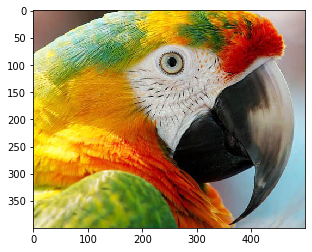

In [2]:
image_name="img2.jpg"
img=mpimg.imread('img2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
image = misc.imread(image_name)

C:\Users\josin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [4]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Largura:",w)
print("Altura:",h)
print("Dimensões/Pixels:",d)
print("Cada pixel assume valores entre [0 -255]")
print("\Toda imagem demanda {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("O que resulta em um arquivo de tamanho {} Mb".format((w*h*d)/(10000000)))

Largura: 400
Altura: 500
Dimensões/Pixels: 3
Cada pixel assume valores entre [0 -255]
\Toda imagem demanda 400 x 500 x 3 = 600000 bytes
O que resulta em um arquivo de tamanho 0.06 Mb


In [5]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
# plt.imshow behaves works well on float data (need to be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255
# # Load Image and transform to a 2D numpy array.
# w, h, d = original_shape = tuple(image.shape)
# print(w,h,d)

assert d == 3 #The code forward runs for 3 channel only 

In [6]:
image_array = np.reshape(image, (w * h, d))
print(image_array)
print(image_array.shape)

[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
(200000, 3)


In [7]:
%%javascript
//To make the output area non-scrollable
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# K-Means com K=2

In [8]:
n_colors = 2 #Value of k

In [9]:
print("Fitting model on a small sub-sample of the data")

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(2) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [10]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
Predicted Labels: [1 1 1 ... 1 1 1]


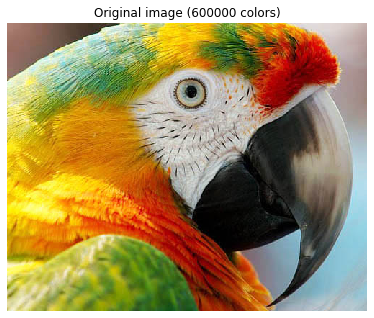

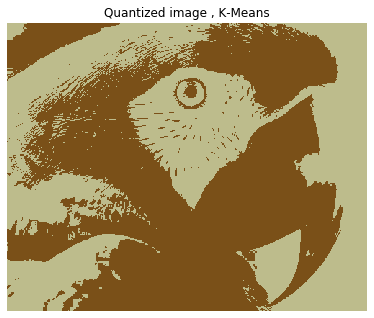

In [11]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image , K-Means')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [12]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Largura:",w)
print("Altura:",h)
print("Bits/cor:",n_colors)
print("O tamanho aproximado, para K=2, é: ({} x {} x {})/8 = {} Kbytes".format(w,h,n_colors,((w*h*n_colors)/8)/1000))


Largura: 400
Altura: 500
Bits/cor: 2
O tamanho aproximado, para K=2, é: (400 x 500 x 2)/8 = 50.0 Kbytes
